## 1. 개요
    - 파이썬으로 구현된 쉽고 간결한 딥러닝 라이브러리
    - 구글의 엔지니어인 프랑소와 숄래가 2015년 3월에 발표
    - 내부적으로는 텐서플로우 엔진이 구동되지만 직관적인 API로 쉽게 딥러닝 실험을 할 수 있도록 지원함
    
## 2. 주요 특징
    - 모듈화 : 독립적인 모듈들을 조합하여 구현
    - 최소주의 : 각 모듈은 짧고 간결하게
    - 쉬운 확장성 : 클래스나 함수로 모듈을 쉽게 추가할 수 있음
    - 파이썬 기반 : 별도의 설정이 필요
    
    * 참고 : Theano : 딥러닝의 시조새

In [75]:
# 공통 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 한글 깨짐 방지
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop

----
# 회귀 분석 예제

In [6]:
np.random.seed(7)

# txt파일 안에 있는 주석을 뺴고 읽어와야 함 : skip_header 이용
data = np.genfromtxt("data/x09.txt", skip_header=36)
data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [10]:
# 3차원 그래프를 그리기 위한 변수 준비
xdata = np.array(data[:,2], dtype=np.float32)  # 모든 행의 2번째 열
ydata = np.array(data[:,3], dtype=np.float32)
zdata = np.array(data[:,4], dtype=np.float32)

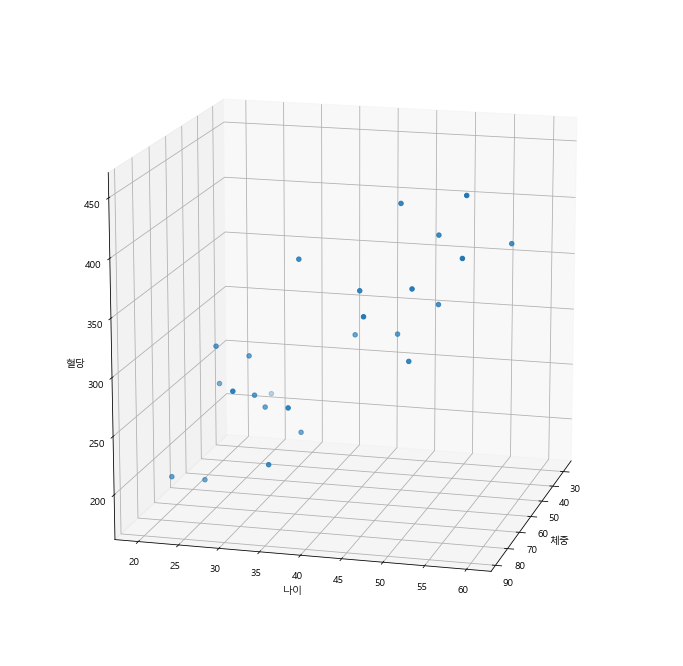

In [11]:
# 3차원 그래프로 데이터 확인
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel("체중")
ax.set_ylabel("나이")
ax.set_zlabel("혈당")
ax.view_init(15, 15)

In [12]:
# 독립변수와 종속변수
x_data = np.array(data[:, 2:4], dtype=np.float32)
y_data = np.array(data[:, 4], dtype=np.float32)

In [21]:
# 회귀분석 모델 생성
# gradient descent를 이용한 .... 이 선형회귀모델의 기본
# keras에선 이를 묶어쓰는 기능이 있음
rmsprop = RMSprop(lr=0.01)

In [22]:
# Neural Network 모델 생성
model = Sequential()
# layer 추가 , Dense : 하나의 은닉층을 생성해 줌
model.add(Dense(1, input_shape=(2, )))
# 비용? loss는 mse로
model.compile(loss="mse", optimizer=rmsprop)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 학습
hist = model.fit(x_data, y_data, epochs=1000)

# 여기서 위의 학습을 다시 실행하면 1001번~ 이렇게 된다. 다시 처음부터 하려면 모델 생성부터 다시 RUN돌려야 함

Epoch 1/1000
25/25 [==============================] - 0s 6ms/step - loss: 193449.8125
Epoch 2/1000
25/25 [==============================] - 0s 39us/step - loss: 190414.5625
Epoch 3/1000
25/25 [==============================] - 0s 80us/step - loss: 188236.1562
Epoch 4/1000
25/25 [==============================] - 0s 40us/step - loss: 186426.0781
Epoch 5/1000
25/25 [==============================] - 0s 80us/step - loss: 184829.5156
Epoch 6/1000
25/25 [==============================] - 0s 50us/step - loss: 183374.5781
Epoch 7/1000
25/25 [==============================] - 0s 36us/step - loss: 182021.3750
Epoch 8/1000
25/25 [==============================] - 0s 57us/step - loss: 180745.0469
Epoch 9/1000
25/25 [==============================] - 0s 78us/step - loss: 179528.8750
Epoch 10/1000
25/25 [==============================] - 0s 54us/step - loss: 178361.2188
Epoch 11/1000
25/25 [==============================] - 0s 40us/step - loss: 177233.4219
Epoch 12/1000
25/25 [=====================

In [18]:
print(hist.history.keys())

dict_keys(['loss'])


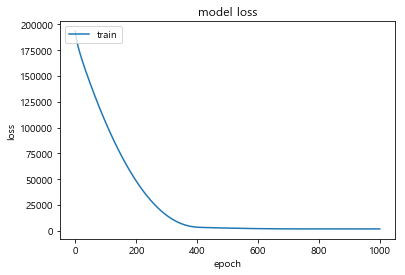

In [24]:
# 임계점 확인
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")

In [26]:
# 예측
# 체중 100, 나이 40인 사람의 혈당은?
model.predict(np.array([100, 40]).reshape(1, 2))
# 체중 60, 나이 25인 사람의 혈당은?
model.predict(np.array([60, 25]).reshape(1, 2))

array([[219.60912]], dtype=float32)

[[1.193741]
 [5.543394]] [9.399798]


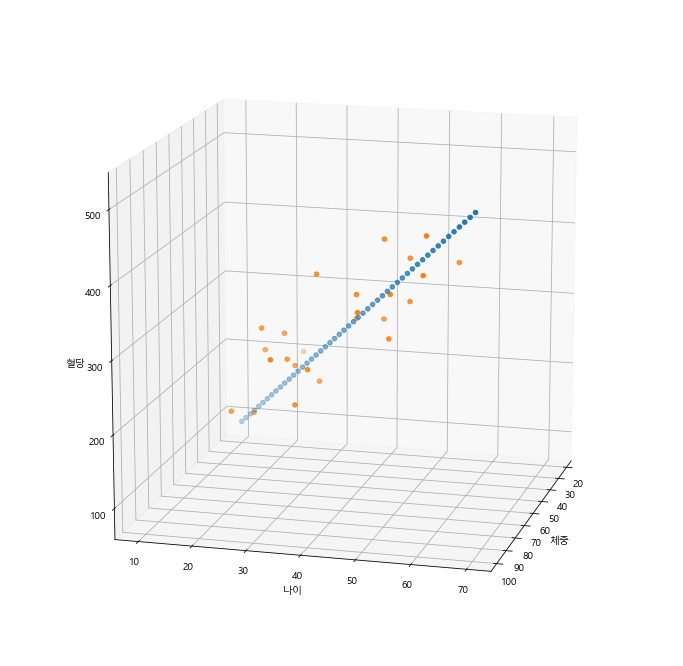

In [35]:
# 회귀선 함 보기
w, b = model.get_weights()
print(w, b)

x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)
x2 = np.concatenate((x,y), axis=1)
z = np.matmul(x2, w) + b

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z)
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel("체중")
ax.set_ylabel("나이")
ax.set_zlabel("혈당")
ax.view_init(15, 15)

In [ ]:
#keras.

## 주택 가격을 사용한 회귀분석
     https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras

In [2]:
from keras.datasets import boston_housing

# 훈련용(404), 테스트용(102) : 총 506개
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
print(train_data.shape, test_data.shape)
print(train_targets[0:10])

(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [4]:
# 스케일 조정
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [5]:
# NN 모델링
def build_model():
    # Sequential : input-hidden-output 만들어줌
    model = Sequential()
    # 2개의 layer 만들기
    model.add(Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation="relu"))
    # 출력 하나
    model.add(Dense(1))
    
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [12]:
# K-fold Cross Validation (교차검증)
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(i, "fold")
    
    # 검증용 데이터
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    # 학습용 데이터
    partial_train_data = np.concatenate([train_data[ : i*num_val_samples], train_data[(i+1)*num_val_samples : ]], axis=0)
    partial_train_targets = np.concatenate([train_targets[ : i*num_val_samples], train_targets[(i+1)*num_val_samples : ]], axis=0)
    
    # 케라스 모델 구성
    model = build_model()
    
    # fit안에 이미 몇번 훈련을 시킬지 들어가있음.
    # 실행 중의 결과들 출력 설정 : varbose (과정보려면 1, 아니면 0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    
    # 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

0 fold
Epoch 1/100
303/303 [==============================] - 0s 2ms/step - loss: 203.3137 - mean_absolute_error: 10.8666
Epoch 2/100
303/303 [==============================] - 0s 826us/step - loss: 29.7092 - mean_absolute_error: 3.8145
Epoch 3/100
303/303 [==============================] - 0s 869us/step - loss: 22.2652 - mean_absolute_error: 3.2654
Epoch 4/100
303/303 [==============================] - 0s 866us/step - loss: 18.8877 - mean_absolute_error: 2.9491
Epoch 5/100
303/303 [==============================] - 0s 839us/step - loss: 17.0676 - mean_absolute_error: 2.7792
Epoch 6/100
303/303 [==============================] - 0s 876us/step - loss: 16.3242 - mean_absolute_error: 2.7039
Epoch 7/100
303/303 [==============================] - 0s 902us/step - loss: 14.5732 - mean_absolute_error: 2.5497
Epoch 8/100
303/303 [==============================] - 0s 1ms/step - loss: 13.7362 - mean_absolute_error: 2.4991
Epoch 9/100
303/303 [==============================] - 0s 816us/step - loss

In [13]:
all_scores

[2.164663557959075, 2.3651642634136842, 2.5027035321339524, 2.488962474435863]

In [14]:
np.mean(all_scores) # 오차의 평균  -> 실제 주택가격과 2.38정도 차이가 난다. (2천 3백 80만 정도?)

2.3803734569856436

## 인공 신경망

### Basic

In [15]:
X = np.array([0, 1, 2, 3, 4])
y = X * 2 + 1

In [16]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile("SGD", "mse")
model.fit(X[:2], y[:2], epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 120ms/step - loss: 5.7904
Epoch 2/500
2/2 [==============================] - 0s 499us/step - loss: 5.5074
Epoch 3/500
2/2 [==============================] - 0s 997us/step - loss: 5.2390
Epoch 4/500
2/2 [==============================] - 0s 499us/step - loss: 4.9843
Epoch 5/500
2/2 [==============================] - 0s 499us/step - loss: 4.7426
Epoch 6/500
2/2 [==============================] - 0s 997us/step - loss: 4.5133
Epoch 7/500
2/2 [==============================] - 0s 499us/step - loss: 4.2957
Epoch 8/500
2/2 [==============================] - 0s 499us/step - loss: 4.0893
Epoch 9/500
2/2 [==============================] - 0s 998us/step - loss: 3.8934
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 3.7075
Epoch 11/500
2/2 [==============================] - 0s 499us/step - loss: 3.5311
Epoch 12/500
2/2 [==============================] - 0s 998us/step - loss: 3.3637
Epoch 13/500
2/2 [=====================

In [17]:
# flatten : 다차원을 1차원으로 푸는 함수
print("Targets : ", y[2:])
print("predictions : ", model.predict(X[2:]).flatten())

Targets :  [5 7 9]
predictions :  [4.75876 6.5842  8.40964]


## MNIST

In [77]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import load_model
from keras.layers import Activation

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# 스케일 조정
X_train = X_train.reshape(60000, 784).astype("float32") / 255.0
X_test = X_test.reshape(10000, 784).astype("float32") / 255.0

# one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [5]:
# validation 분할
x_val = X_train[:12600]
x_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]

In [6]:
# Keras 모델 구성
model = Sequential()
# 입력층 만들기
model.add(Dense(units=64, input_dim=28*28, activation="relu"))
# 출력층 만들기
model.add(Dense(units=10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
#!pip install graphviz
#!pip install pydot
# import os
# os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
# SVG(model_to_dot(model, show_shapes=True)).create(prog="dot", format="svg")

In [9]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 47400 samples, validate on 12600 samples
Epoch 1/5
47400/47400 [==============================] - 3s 56us/step - loss: 0.7704 - acc: 0.8015 - val_loss: 0.4104 - val_acc: 0.8910
Epoch 2/5
47400/47400 [==============================] - 3s 54us/step - loss: 0.3729 - acc: 0.8973 - val_loss: 0.3368 - val_acc: 0.9075
Epoch 3/5
47400/47400 [==============================] - 2s 52us/step - loss: 0.3192 - acc: 0.9103 - val_loss: 0.2956 - val_acc: 0.9171
Epoch 4/5
47400/47400 [==============================] - 3s 53us/step - loss: 0.2893 - acc: 0.9188 - val_loss: 0.2737 - val_acc: 0.9241
Epoch 5/5
47400/47400 [==============================] - 2s 50us/step - loss: 0.2675 - acc: 0.9251 - val_loss: 0.2592 - val_acc: 0.9283


In [11]:
# 모델 평가
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print("loss_and_metrics : " + str(loss_and_metrics))

10000/10000 [==============================] - 0s 22us/step
loss_and_metrics : [0.24826740251481533, 0.9302]


In [21]:
# 실제 예측
xhat_idx = np.random.choice(X_test.shape[0], 10)
xhat = X_test[xhat_idx]
yhat = model.predict_classes(xhat)
yhat

array([1, 1, 6, 6, 3, 2, 0, 9, 7, 8], dtype=int64)

In [22]:
for i in range(10):
    print("True : " + str(np.argmax(y_test[xhat_idx[i]])) + ", Prdict : " + str(yhat[i]))

True : 1, Prdict : 1
True : 1, Prdict : 1
True : 6, Prdict : 6
True : 6, Prdict : 6
True : 3, Prdict : 3
True : 2, Prdict : 2
True : 0, Prdict : 0
True : 9, Prdict : 9
True : 7, Prdict : 7
True : 8, Prdict : 8


In [23]:
# 작업 내용 파일로 저장
model.save("data/mnist_mlp_model.h5")

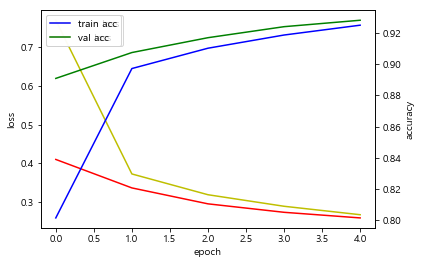

In [25]:
# 리턴값으로 학습 이력(History) 정보를 리턴
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history["loss"], "y", label="train loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val loss")
acc_ax.plot(hist.history["acc"], "b", label="train acc")
acc_ax.plot(hist.history["val_acc"], "g", label="val acc")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")
loss_ax.legend(loc="upper left")
acc_ax.legend(loc="Lower left")

In [31]:
# 모델 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(10000, 784).astype("float32") / 255.0
y_test = np_utils.to_categorical(y_test)

xhat_idx = np.random.choice(X_test.shape[0], 5)
xhat = X_test[xhat_idx]

model = load_model("data/mnist_mlp_model.h5")

yhat = model.predict_classes(xhat)
for i in range(5):
    print("True : " + str(np.argmax(y_test[xhat_idx[i]])) + ", Prdict : " + str(yhat[i]))

True : 1, Prdict : 1
True : 9, Prdict : 9
True : 9, Prdict : 9
True : 2, Prdict : 2
True : 1, Prdict : 1


### 당뇨병 데이터셋
    - 피마족 인디언 당뇨병 발병 데이터셋(768개, 속성수:8개, 클래스:2가지)
        1. 임신횟수
        2. 경구 포도당 내성검사에서 2시간 동안의 혈장 포도당 농도
        3. 이완기 혈압(mm Hg)
        4. 삼두근 피부 두겹 두께(mm)
        5. 2시간 혈청 인슐린(mu U/ml)
        6. 체질량 지수
        7. 당뇨 직계 가족력
        8. 나이
        9. 5년 이내 당뇨병의 발병 여부
        
    - 양성 : 268개(34.9%), 음성 : 500개(65.1%)

In [3]:
np.random.seed(5)
data = np.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")

In [4]:
# 훈련용과 테스트용 데이터셋 분리(7.5 : 2.5)
X_train = data[:576, 0:8]
y_train = data[:576, 8]
X_test = data[576:, 0:8]
y_test = data[576:, 8]

In [7]:
model = Sequential()
# 입력 8차원
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
hist = model.fit(X_train, y_train, epochs=1500, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1500
576/576 [==============================] - 0s 445us/step - loss: 6.9324 - acc: 0.3438
Epoch 2/1500
576/576 [==============================] - 0s 23us/step - loss: 4.7004 - acc: 0.3715
Epoch 3/1500
576/576 [==============================] - 0s 21us/step - loss: 3.3616 - acc: 0.4809
Epoch 4/1500
576/576 [==============================] - 0s 22us/step - loss: 2.8435 - acc: 0.5642
Epoch 5/1500
576/576 [==============================] - 0s 23us/step - loss: 2.5232 - acc: 0.6076
Epoch 6/1500
576/576 [==============================] - 0s 24us/step - loss: 2.1437 - acc: 0.6250
Epoch 7/1500
576/576 [==============================] - 0s 24us/step - loss: 1.8138 - acc: 0.5990
Epoch 8/1500
576/576 [==============================] - 0s 23us/step - loss: 1.6297 - acc: 0.6007
Epoch 9/1500
576/576 [==============================] - 0s 21us/step - loss: 1.4913 - acc: 0.6007
Epoch 10/1500
576/576 [==============================] - 0s 19us/step

In [9]:
scores = model.evaluate(X_test, y_test)
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 283us/step
acc : 73.96%


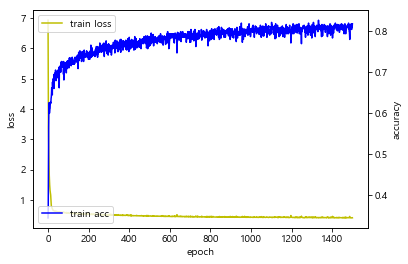

In [11]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history["loss"], "y", label="train loss")
acc_ax.plot(hist.history["acc"], "b", label="train acc")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")
loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

### 붓꽃데이터(IRIS)

In [13]:
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.optimizers import Adam

In [14]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# species one hot encoding
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

# LabelEncoder : one hot encoding을 위한 객체
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y2 = pd.get_dummies(y1).values
y2[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [16]:
# 훈련용, 테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [17]:
# 모델 생성
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 6ms/step - loss: 1.5482 - acc: 0.3250 - val_loss: 1.0930 - val_acc: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 111us/step - loss: 1.0173 - acc: 0.3583 - val_loss: 1.0564 - val_acc: 0.2000
Epoch 3/100
120/120 [==============================] - 0s 100us/step - loss: 0.9377 - acc: 0.3667 - val_loss: 1.0648 - val_acc: 0.2000
Epoch 4/100
120/120 [==============================] - 0s 108us/step - loss: 0.9216 - acc: 0.3667 - val_loss: 1.0134 - val_acc: 0.2000
Epoch 5/100
120/120 [==============================] - 0s 108us/step - loss: 0.8654 - acc: 0.3750 - val_loss: 0.9081 - val_acc: 0.2333
Epoch 6/100
120/120 [==============================] - 0s 124us/step - loss: 0.7902 - acc: 0.4667 - val_loss: 0.8340 - val_acc: 0.6000
Epoch 7/100
120/120 [==============================] - 0s 100us/step - loss: 0.7306 - acc: 0.7167 - val_loss: 0.7849 - val_acc: 0.6000
Epoch 8/100


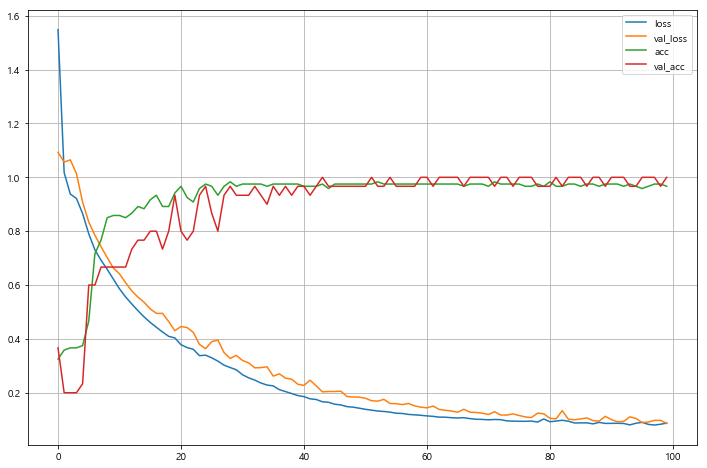

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.legend(["loss", "val_loss", "acc", "val_acc"])
plt.grid()

In [21]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print("정확도 : ", accuracy)

30/30 [==============================] - 0s 71us/step
정확도 :  1.0


In [24]:
# 예측 테스트
y_pred = model.predict(X_test)
# y_pred
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [27]:
# 새로운 값으로 테스트
test_set = np.array([[5, 2.9, 1, 0.2]])
print("품종 예측:{}".format(iris['species'].unique()[model.predict_classes(test_set)]))

test_set = np.array([[7, 3.0, 5, 2.4]])
print("품종 예측 : {}".format(iris['species'].unique()[model.predict_classes(test_set)]))

품종 예측:['setosa']
품종 예측 : ['virginica']


### 타이타닉

In [29]:
raw_data = pd.read_excel("data/titanic.xls")
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Text(0.5, 1.0, '생존자')

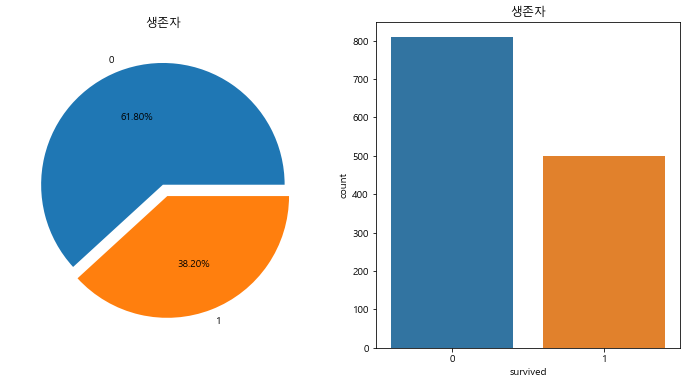

In [30]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
raw_data["survived"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.2f%%", ax=ax[0])
ax[0].set_title("생존자")
ax[0].set_ylabel("")
sns.countplot("survived", data=raw_data, ax=ax[1])
ax[1].set_title("생존자")

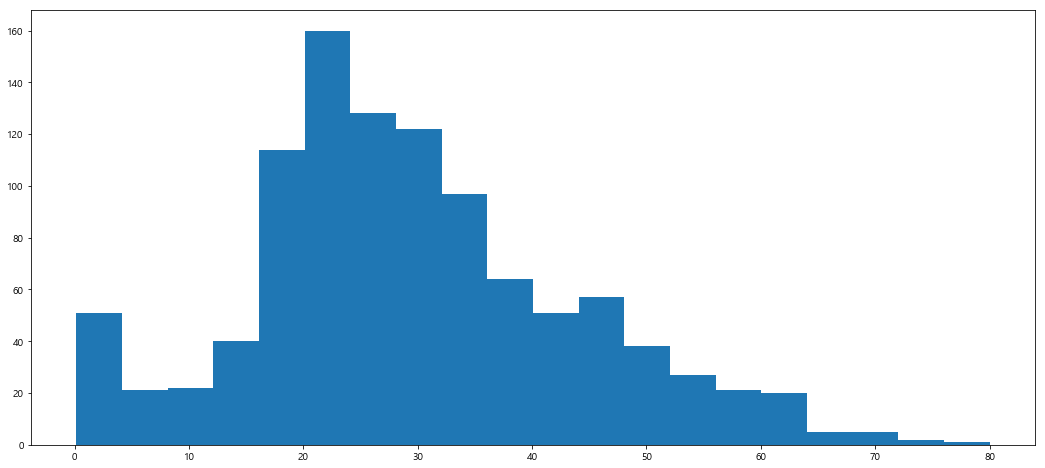

In [31]:
# 나이별 히스토그램
raw_data["age"].hist(bins=20, figsize=(18, 8), grid=False)

In [32]:
raw_data.groupby("pclass").mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


Text(0.5, 1.0, '변수들 간의 상관관계')

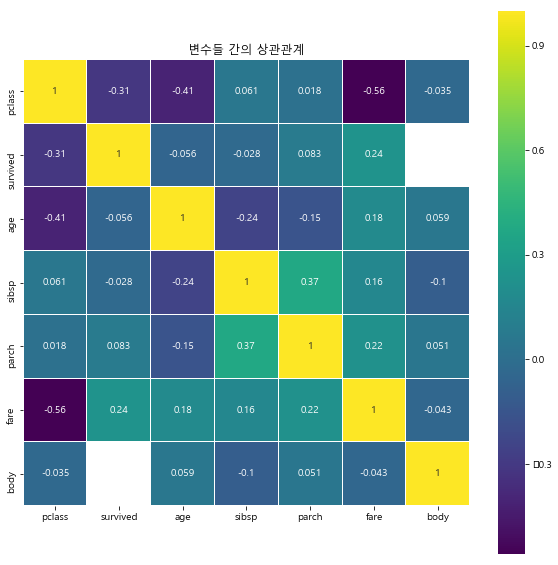

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title("변수들 간의 상관관계")

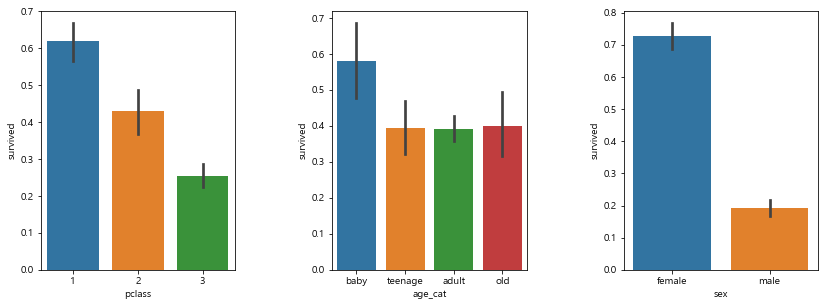

In [34]:
# 등급/연령대/성 별 생존율
raw_data["age_cat"] = pd.cut(raw_data["age"], bins=[0, 10, 20, 50, 100],
                            include_lowest=True,
                            labels=["baby", "teenage", "adult", "old"])
plt.figure(figsize=[12, 4])
plt.subplot(131)
sns.barplot("pclass", "survived", data=raw_data)
plt.subplot(132)
sns.barplot("age_cat", "survived", data=raw_data)
plt.subplot(133)
sns.barplot("sex", "survived", data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)

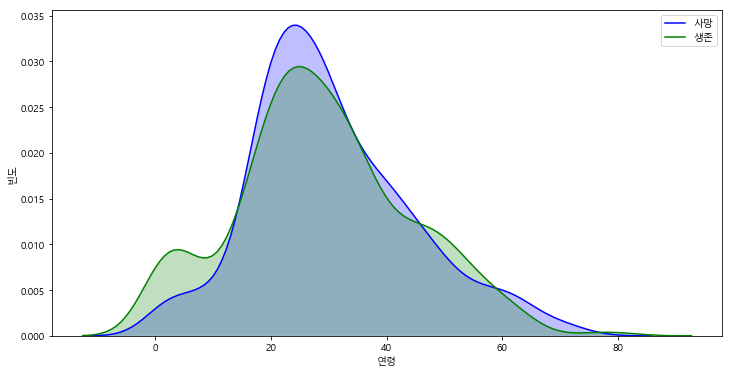

In [35]:
f, ax = plt.subplots(figsize=(12, 6))
g = sns.kdeplot(raw_data["age"][(raw_data["survived"]==0) & (raw_data["age"].notnull())],
               ax=ax, color="Blue", shade=True)
g = sns.kdeplot(raw_data["age"][(raw_data["survived"]==1) & (raw_data["age"].notnull())],
               ax=g, color="Green", shade=True)
g.set_xlabel("연령")
g.set_ylabel("빈도")
g = g.legend(["사망", "생존"])

Text(0.5, 1.0, '성별 구조현황')

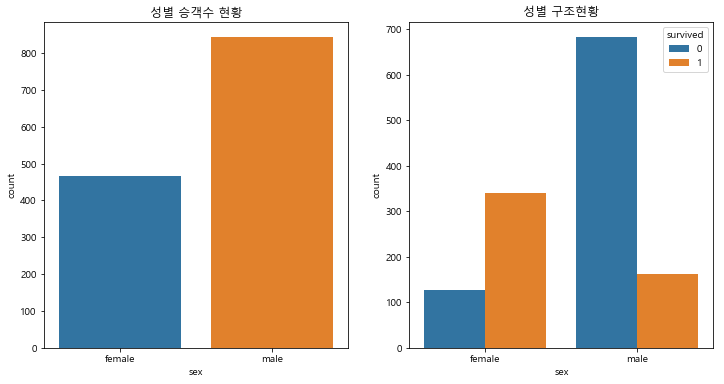

In [36]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot("sex", data=raw_data, ax=ax[0])
ax[0].set_title("성별 승객수 현황")
sns.countplot("sex", hue="survived", data=raw_data, ax=ax[1])
ax[1].set_title("성별 구조현황")

Text(0.5, 1.0, '생존자')

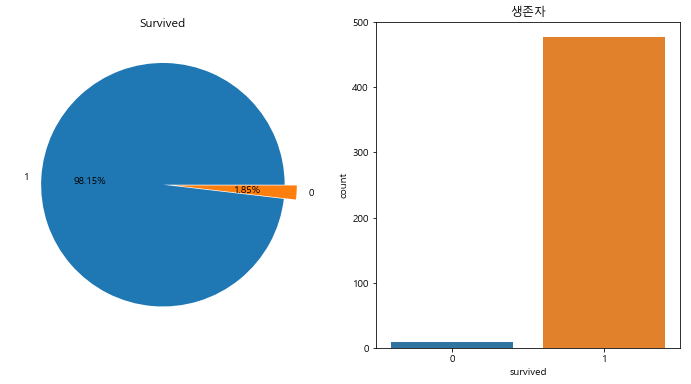

In [38]:
# 구명보트
boat_survivors = raw_data[raw_data["boat"].notnull()]
f, ax = plt.subplots(1, 2, figsize=(12, 6))
boat_survivors["survived"].value_counts().plot.pie(explode=[0, 0.1], 
                                autopct="%1.2f%%", ax=ax[0])
ax[0].set_title("Survived")
ax[0].set_ylabel("")
sns.countplot("survived", data=boat_survivors, ax=ax[1])
ax[1].set_title("생존자")

In [39]:
# 성별 숫자화
tmp = []
for each in raw_data["sex"]:
    if each == "female":
        tmp.append(1)
    elif each == "male":
        tmp.append(0)
    else:
        tmp.append(np.nan)
        
raw_data["sex"] = tmp

In [40]:
# 정수형 데이터 실수화
raw_data["survived"] = raw_data['survived'].astype("float")
raw_data["pclass"] = raw_data['pclass'].astype("float")
raw_data["sex"] = raw_data['sex'].astype("float")
raw_data["sibsp"] = raw_data['sibsp'].astype("float")
raw_data["parch"] = raw_data['parch'].astype("float")
raw_data["fare"] = raw_data['fare'].astype("float")

In [41]:
# 결측값 제거
raw_data = raw_data[raw_data["age"].notnull()]
raw_data = raw_data[raw_data["sibsp"].notnull()]
raw_data = raw_data[raw_data["parch"].notnull()]
raw_data = raw_data[raw_data["fare"].notnull()]

In [42]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [43]:
# 사용할 컬럼만 뽑아주기
X = raw_data.values[:, [0, 3, 4, 5, 6, 8]]
y = raw_data.values[:, [1]]

# 훈련용, 테스트용 구분
X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="mse", optimizer="Adam", metrics=["accuracy"])
model.summary()

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.legend(["loss", "val_loss", "acc", "val_acc"])
plt.grid()

In [ ]:
# 3등석, 남성, 19세, 형제/부부 없음, 부모/자녀 없음, 낮은 요금
person1 = np.array([3., 0., 19., 0., 0., 5.]).reshape(1, 6)

# 1등석, 여성, 17세, 약혼자와 탑승, 부모와 탑승, 높은 요금
person2 = np.array([1., 1., 17., 1., 2., 100.]).reshape(1, 6)

print(model.predict(person1))
print(model.predict(person2))

# DNN(Deep Neural Network)
    - 다층 퍼셉트론을 확장시킨 개념

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
# 차원 조정 (3차원 -> 2차원)
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

In [6]:
# 표준화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
def make_model(input_number, hidden_layers, output_number):
    model = Sequential()
    # hidden layer가 실제 출력수???/
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(input_number, ), name="Hidden-1"))
    # 두번째 은닉층 준비(input없다)
    model.add(Dense(hidden_layers[1], activation="relu", name="Hidden-2"))
    # Dropout? 과적합 예방, 복잡한 연결 몇개 끊기, 0.2: 20%는 끊어놓고 80% 훈련 
    model.add(keras.layers.Dropout(0.2))
    # 출력 (10개 중 하나 선택 - 다중 분류)
    model.add(Dense(output_number, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    return model

In [11]:
# make_model 함수를 어떻게 사용할 것인지
# 모델 생성

input_number = 784
hidden_layers = [100, 50]  # 첫번째 hidden 100개 출력, 두번쨰 hidden 50개 출력
# 레이블의 카테고리 갯수
number_of_class = 10
output_number = number_of_class

model = make_model(input_number, hidden_layers, output_number)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
hist = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.4459 - acc: 0.8692 - val_loss: 0.1812 - val_acc: 0.9485
Epoch 2/5
48000/48000 [==============================] - 2s 35us/step - loss: 0.1858 - acc: 0.9455 - val_loss: 0.1302 - val_acc: 0.9613
Epoch 3/5
48000/48000 [==============================] - 2s 33us/step - loss: 0.1330 - acc: 0.9606 - val_loss: 0.1089 - val_acc: 0.9676
Epoch 4/5
48000/48000 [==============================] - 2s 33us/step - loss: 0.1038 - acc: 0.9690 - val_loss: 0.1013 - val_acc: 0.9713
Epoch 5/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.0888 - acc: 0.9727 - val_loss: 0.0953 - val_acc: 0.9718


In [13]:
# 기존 make_model을 수정하여 레이어 하나를 더 추가

def make_model(input_number, hidden_layers, output_number):
    model = Sequential()
    # hidden layer가 실제 출력수???/
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(input_number, ), name="Hidden-1"))
    # 두번째 은닉층 준비(input없다)
    model.add(Dense(hidden_layers[1], activation="relu", name="Hidden-2"))
    # layer 추가
    model.add(Dense(hidden_layers[2], activation="relu", name="Hidden-3"))
    # Dropout? 과적합 예방, 복잡한 연결 몇개 끊기, 0.2: 20%는 끊어놓고 80% 훈련 
    model.add(keras.layers.Dropout(0.2))
    # 출력 (10개 중 하나 선택 - 다중 분류)
    model.add(Dense(output_number, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    return model

In [14]:
# 모델 생성

input_number = 784
hidden_layers = [100, 50, 30]  # 첫번째 hidden 100개 출력, 두번쨰 hidden 50개 출력, 세번째 30개
# 레이블의 카테고리 갯수
number_of_class = 10
output_number = number_of_class

model = make_model(input_number, hidden_layers, output_number)

In [15]:
hist = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

# 결과에 별 변화가 없음 -> 무작정 layer를 늘린다고 성능이 좋아지는 것 아니다

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.4941 - acc: 0.8515 - val_loss: 0.1760 - val_acc: 0.9499
Epoch 2/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.1953 - acc: 0.9450 - val_loss: 0.1275 - val_acc: 0.9628
Epoch 3/5
48000/48000 [==============================] - 2s 33us/step - loss: 0.1426 - acc: 0.9596 - val_loss: 0.1170 - val_acc: 0.9654
Epoch 4/5
48000/48000 [==============================] - 2s 34us/step - loss: 0.1130 - acc: 0.9675 - val_loss: 0.1070 - val_acc: 0.9685
Epoch 5/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.0955 - acc: 0.9726 - val_loss: 0.0995 - val_acc: 0.9692


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               78500     
_________________________________________________________________
Hidden-2 (Dense)             (None, 50)                5050      
_________________________________________________________________
Hidden-3 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 85,390
Trainable params: 85,390
Non-trainable params: 0
_________________________________________________________________


## CNN

### MNIST

In [24]:
model = Sequential()
# 1번째 Convolution
# 필터의 갯수: 32, 필터의 크기: 3*3
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

# 2번째 Convolution
# 필터의 갯수: 64, 필터의 크기:3*3
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

# 3번째 Convolution
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))

# FC에 결과 전달
model.add(keras.layers.Flatten())
model.add(Dense(64, activation="relu"))
# 최종 출력
model.add(Dense(10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [27]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [30]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)
# 

Epoch 1/5
60000/60000 [==============================] - 36s 596us/step - loss: 0.1718 - acc: 0.9463
Epoch 2/5
60000/60000 [==============================] - 36s 600us/step - loss: 0.0470 - acc: 0.9860
Epoch 3/5
60000/60000 [==============================] - 38s 635us/step - loss: 0.0317 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 40s 660us/step - loss: 0.0241 - acc: 0.9928
Epoch 5/5
60000/60000 [==============================] - 40s 663us/step - loss: 0.0198 - acc: 0.9941


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc  # 0.991

10000/10000 [==============================] - 2s 228us/step


0.991

### 컬러 이미지 분류
    - CIFAR-10 데이터(카테고리는 10가지)
    - 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
    - 6만장(학습용:5만장, 검증용:1만장)
    - 32 * 32 이미지
    - 32 * 32 * 3 RGB 컬러 이미지
    - http://www.cs.toronto.edu/~kriz/cifar.html

In [32]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import os
from keras import datasets
from keras.utils import np_utils
from keras import layers, models
from six.moves import cPickle
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style="white", font_scale=1.7)
sns.set_style("ticks")

In [35]:
# 데이터 준비
def make_data():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    
    # one-hot encoding
    Y_train = keras.utils.to_categorical(y_train, 10)
    Y_test = keras.utils.to_categorical(y_test, 10)
    
    # 표준화
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255
    X_test /= 255
    
    return (X_train, Y_train), (X_test, Y_test)

In [36]:
# 모델 생성
def make_model():
    model = Sequential()
    
    # 1번째 Convolution
    # padding : 이미지의 사이즈가 급격히 작아지는 것 방지
    model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding="same"))
    model.add(Activation("relu"))
    
    # 두번째 Convolution
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Dropout
    model.add(Dropout(0.25))
    
    # 세번째 Convolution
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    
    # 네번째 Convolution
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # FC
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    
    # 최종 출력
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    return model

In [37]:
# Cost plotting
def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    if title is not None:
        plt.title(title)
    
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [38]:
# Accuracy plotting
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
        
    plt.plot(history["acc"])
    plt.plot(history["val_acc"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [54]:
f = open('C:/Users/wjdqh/.keras/datasets/cifar-10-batches-py/data_batch_1', "rb")   # 이진파일이니까 걍 r이 아니라 rb로 읽어와야 함
# 압축 풀기
datadict = cPickle.load(f, encoding="latin1")
X = datadict["data"]
Y = datadict["labels"]

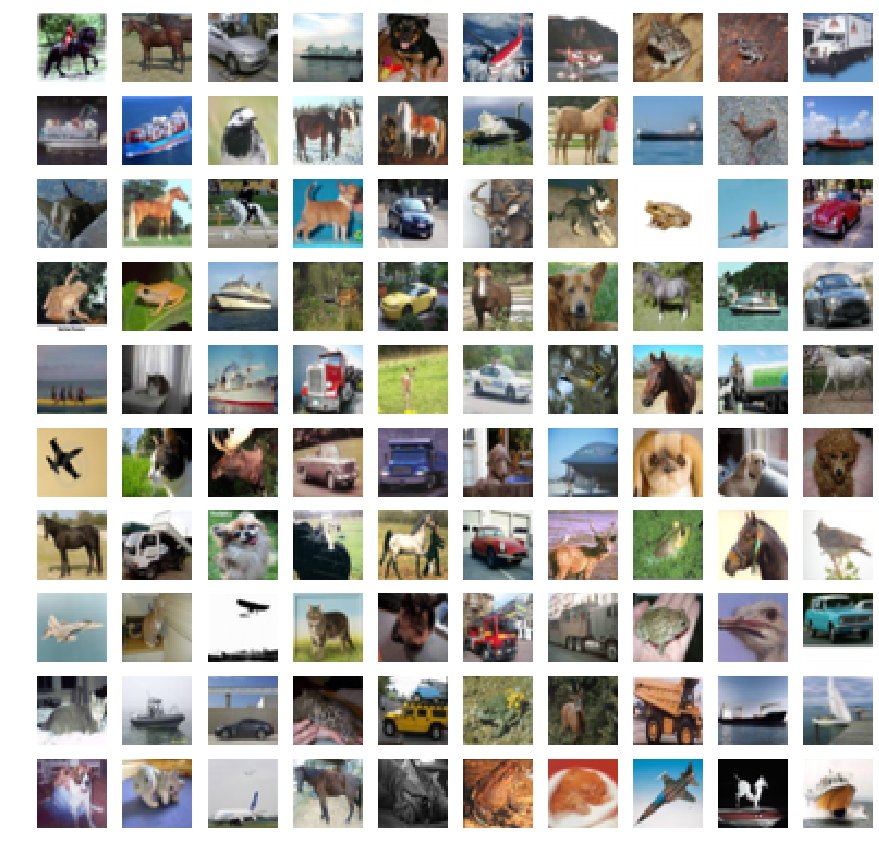

In [55]:
# [4, 3, 32, 32]을 [4, 32, 32, 3]
X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")  # 배열변경
Y = np.array(Y)

fig, axes1 = plt.subplots(10, 10, figsize=(15, 15))
for j in range(10):
    for k in range(10):
        i = np. random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i : i+1][0])

In [57]:
(X_train, Y_train), (X_test, Y_test) = make_data()

In [58]:
model = make_model()

In [59]:
hist = model.fit(X_train, Y_train, epochs=3, batch_size=32, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 231s 6ms/step - loss: 1.9111 - acc: 0.2988 - val_loss: 1.6362 - val_acc: 0.4089
Epoch 2/3
40000/40000 [==============================] - 224s 6ms/step - loss: 1.5822 - acc: 0.4219 - val_loss: 1.4712 - val_acc: 0.4732
Epoch 3/3
40000/40000 [==============================] - 219s 5ms/step - loss: 1.4360 - acc: 0.4804 - val_loss: 1.3319 - val_acc: 0.5270


In [60]:
test = model.evaluate(X_test, Y_test, batch_size=100)
test

10000/10000 [==============================] - 17s 2ms/step


[1.3193540060520172, 0.5269999986886978]

### AutoEncoder

In [61]:
# 정확도 plotting
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["acc"])
    plt.plot(history["val_acc"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [62]:
# 학습용과 검증용의 손실률을 plotting
def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    if title is not None:
        plt.title(title)
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [63]:
# 위의 두 함수를 호출하기 위한 함수
def plot_loss_acc(history):
    plot_loss(history, "손실 추이")
    plt.show()
    plot_acc(history, "정확도 추이")
    plt.show()

In [71]:
# AutoEncoder 모델링
# https://keras.io/models/model/
class AE(keras.models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes, )
        
        # 입력 계층
        x = keras.layers.Input(shape=x_shape)
        
        # 은닉 계층
        z = keras.layers.Dense(z_dim, activation="relu")(x)
        
        # 출력 계층
        # 크기 복원
        y = keras.layers.Dense(x_nodes, activation="sigmoid")(z)
        
        # 여기에서 sequential 생성이 된다??
        super().__init__(x, y)
        self.x = x
        self.z = z
        self.z_dim = z_dim
        
        self.compile(optimizer="adadelta", loss="binary_crossentropy", metrics=["accuracy"])
    
    def Encoder(self):
        return keras.models.Model(self.x, self.z)
    
    def Decoder(self):
        z_shape = (self.z_dim, )
        z = keras.layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return keras.models.Model(z, y)

In [65]:
# 비지도 학습
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

In [66]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [69]:
X_train.shape
# 2차원으로 만들기
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
print(X_train.shape)
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_test.shape)

(60000, 784)
(10000, 784)


In [72]:
X_nodes = 784
# 이미지 크기를 아래와 같이 줄일 것 임
z_dim = 36

autoencoder = AE(X_nodes, z_dim)

In [73]:
hist = autoencoder.fit(X_train, X_train, epochs=5, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.3571 - acc: 0.7538 - val_loss: 0.2708 - val_acc: 0.7953
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2627 - acc: 0.7968 - val_loss: 0.2513 - val_acc: 0.7974
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2412 - acc: 0.7964 - val_loss: 0.2290 - val_acc: 0.7961
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2219 - acc: 0.7963 - val_loss: 0.2125 - val_acc: 0.7961
Epoch 5/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2080 - acc: 0.7975 - val_loss: 0.2006 - val_acc: 0.7977


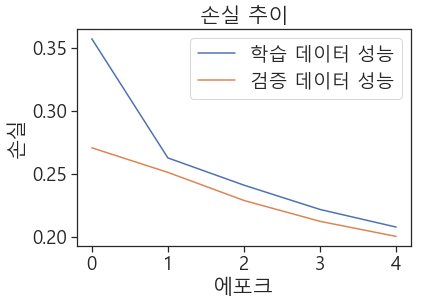

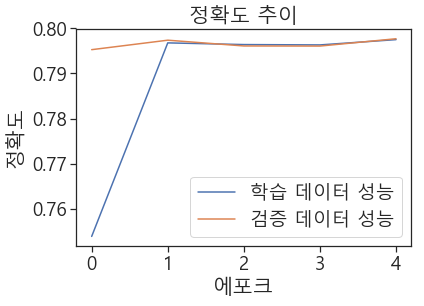

In [76]:
plot_loss_acc(hist)

In [78]:
def show_ae(autoencoder):
    # 부호화, 복호화 모델의 인스턴스 생성
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()
    # 평가용 이미지들을 넣어서 부호화 결과와 복호화 결과 생성
    encoded_imgs = encoder.predict(X_test)
    # 부호화된 이미지를 넣어서 복호화 데이터를 생성함
    decoded_imgs = decoder.predict(encoded_imgs)
    # 화면에 표시할 이미지 수
    n = 10
    # subplot 방식을 사용하여 10개를 하나의 그래프로 그리기 위해 그림의 전체 크기를 20, 6으로 설정
    plt.figure(figsize=(20, 6))
    for i in range(n):
        ax = plt.subplot(3, n, i+1)
        # 입력 이미지(평가용 이미지)
        plt.imshow(X_test[i].reshape(28, 28))
        # 흑백으로 출력
        plt.gray()
        # 이미지 주변 축들이 보이지 않게 함
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(3, n, i+1+n)
        # 이미지가 압축된 형태(2차원 이미지를 1차원의 벡터로 압축)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(3, n, i+1+n+n)
        # 복호화한 이미지 출력
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

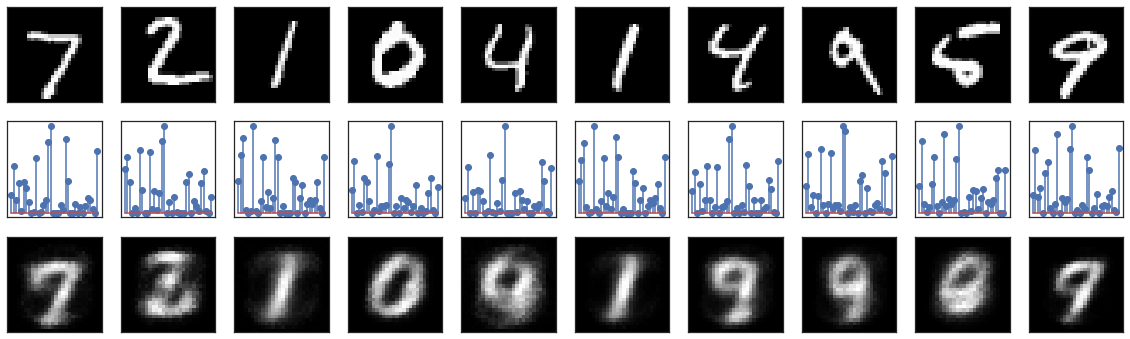

In [79]:
show_ae(autoencoder)